# 2. Accessing Text Corpora and Lexical Resources

Practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora. The goal of this chapter is to answer the following questions:

* What are some useful text corpora and lexical resources, and how can we access them with Python?
* Which Python constructs are most helpful for this work?
* How do we avoid repeating ourselves when writing Python code?

This chapter continues to present programming concepts by example, in the context of a linguistic processing task. We will wait until later before exploring each Python construct systematically. Don't worry if you see an example that contains something unfamiliar; simply try it out and see what it does, and — if you're game — modify it by substituting some part of the code with a different text or word. This way you will associate a task with a programming idiom, and learn the hows and whys later.



# #  1   Accessing Text Corpora

In [1]:
#1. Accessing Text Corpora
import nltk
from __future__ import print_function
#1.2 Gutenburg Corpus
nltk.corpus.gutenberg.fileids()
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)
type(emma)

emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance('surprize')

from nltk.corpus import gutenberg
gutenberg.fileids()



for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)
    #average word length, average sentence length, number of times each vocabulary item appears on average(lexical diversity score)

macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences[1116]
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len]


Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

In [23]:
#1.2 Web and chat text
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [30]:
# 1.3 Brown corpus
from nltk.corpus import brown
brown.categories()
brown.words(categories='news')
brown.words(fileids='cg22')
brown.sents(categories=['news','editorial','reviews'])

news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m+':',fdist[m],end=' ')

# conditional frequency distributions
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389                   can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [33]:
# 1.4 Reuters Corpus
from nltk.corpus import reuters
reuters.fileids()
reuters.categories()

[u'1789-Washington.txt',
 u'1793-Washington.txt',
 u'1797-Adams.txt',
 u'1801-Jefferson.txt',
 u'1805-Jefferson.txt',
 u'1809-Madison.txt',
 u'1813-Madison.txt',
 u'1817-Monroe.txt',
 u'1821-Monroe.txt',
 u'1825-Adams.txt',
 u'1829-Jackson.txt',
 u'1833-Jackson.txt',
 u'1837-VanBuren.txt',
 u'1841-Harrison.txt',
 u'1845-Polk.txt',
 u'1849-Taylor.txt',
 u'1853-Pierce.txt',
 u'1857-Buchanan.txt',
 u'1861-Lincoln.txt',
 u'1865-Lincoln.txt',
 u'1869-Grant.txt',
 u'1873-Grant.txt',
 u'1877-Hayes.txt',
 u'1881-Garfield.txt',
 u'1885-Cleveland.txt',
 u'1889-Harrison.txt',
 u'1893-Cleveland.txt',
 u'1897-McKinley.txt',
 u'1901-McKinley.txt',
 u'1905-Roosevelt.txt',
 u'1909-Taft.txt',
 u'1913-Wilson.txt',
 u'1917-Wilson.txt',
 u'1921-Harding.txt',
 u'1925-Coolidge.txt',
 u'1929-Hoover.txt',
 u'1933-Roosevelt.txt',
 u'1937-Roosevelt.txt',
 u'1941-Roosevelt.txt',
 u'1945-Roosevelt.txt',
 u'1949-Truman.txt',
 u'1953-Eisenhower.txt',
 u'1957-Eisenhower.txt',
 u'1961-Kennedy.txt',
 u'1965-Johnson.tx

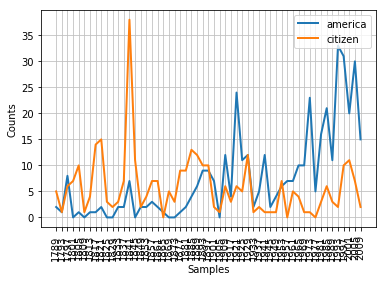

['N',
 '__add__',
 '__and__',
 '__class__',
 '__cmp__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'clear',
 'conditions',
 'copy',
 'default_factory',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'plot',
 'pop',
 'popitem',
 'setdefault',
 'tabulate',
 'unicode_repr',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [35]:
#1.5 Inaugural Address Corpus
from nltk.corpus import inaugural
inaugural.fileids()

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america','citizen']
    if w.lower().startswith(target)
)
cfd.plot()
# dir(cfd)

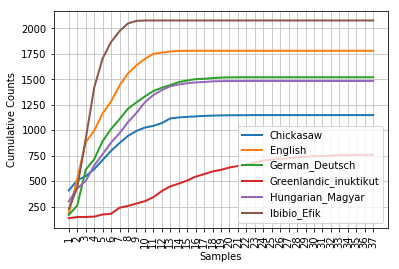

In [36]:
#coepora in other languages
from nltk.corpus import udhr
languages = ['Chickasaw','English','German_Deutsch','Greenlandic_inuktikut','Hungarian_Magyar','Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang+'-Latin1')
)
cfd.plot(cumulative=True)

# 2 Conditional Frequency Distributions

In [45]:
# 2.2 counting words by genre
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

genre_word = [(genre,word)
             for genre in ['news','romance']
             for word in brown.words(categories=genre)
]
# len(genre_word)
# genre_word
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()
cfd
print(cfd['news'])
print(cfd['romance'])
cfd['romance'].most_common(20)
cfd['romance']['could']

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>


193

In [52]:
# 2.3 plotting and tabulating distributions
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america','citizen']
    if w.lower().startswith(target)
)

# cfd.plot()
cfd.tabulate()

        1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 1829 1833 1837 1841 1845 1849 1853 1857 1861 1865 1869 1873 1877 1881 1885 1889 1893 1897 1901 1905 1909 1917 1921 1925 1929 1933 1937 1941 1945 1949 1953 1957 1961 1965 1969 1973 1977 1981 1985 1989 1993 1997 2001 2005 2009 
america    2    1    8    0    1    0    1    1    2    0    0    2    2    7    0    2    2    3    2    1    0    0    1    2    4    6    9    9    7    0   12    4   24   11   12    2    5   12    2    4    6    7    7   10   10   23    5   16   21   11   33   31   20   30   15 
citizen    5    1    6    7   10    1    4   14   15    3    2    3    7   38   11    2    4    7    7    0    5    3    9    9   13   12   10   10    2    1    6    3    6    5   12    1    2    1    1    1    7    0    5    4    1    1    0    3    6    3    2   10   11    7    2 


In [54]:
from nltk.corpus import udhr
languages = ['Chickasaw','English','German_Deutsch','Greenlandic_inuktikut','Hungarian_Magyar','Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang+'-Latin1')
)
cfd.tabulate(conditions=['English','German_Deutsch'],sample=range(10), cumulative=True)

                  1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21 
       English  185  525  883  997 1166 1283 1440 1558 1638 1701 1751 1763 1774 1780 1781 1781 1781 1781 1781 1781 1781 
German_Deutsch  171  263  614  717  894 1013 1110 1213 1275 1333 1386 1418 1445 1474 1489 1503 1506 1513 1518 1520 1521 


In [67]:
#2.4 generating random text with bigrams
sent = ['In','the','beginning','God','created','the','heaven','and','the','earth','.']
list(nltk.bigrams(sent))

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

cfd['living']
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

ConditionalFreqDist(nltk.probability.FreqDist,
                    {u'Allonbachuth': FreqDist({u'.': 1}),
                     u'Leah': FreqDist({u"'": 5,
                               u',': 7,
                               u'.': 2,
                               u':': 1,
                               u';': 1,
                               u'Zilpah': 1,
                               u'also': 1,
                               u'and': 1,
                               u'answered': 1,
                               u'conceived': 2,
                               u'his': 2,
                               u'said': 4,
                               u'saw': 1,
                               u'to': 1,
                               u'was': 2,
                               u'went': 1}),
                     u'child': FreqDist({u',': 2,
                               u'.': 2,
                               u';': 1,
                               u'among': 1,
                               

In [74]:
# 4.Lexical Resources
# 4.1 Wordlist Corpus
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))
unusual_words(nltk.corpus.nps_chat.words())

# stopwords
from nltk.corpus import stopwords
stopwords.words('english')

#conpute fractions of words are not in the stopword list
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content)/len(text)

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [78]:
# A word puzzle
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >=6
            and obligatory in w and nltk.FreqDist(w) <= puzzle_letters
]

FreqDist({'e': 1, 'g': 1, 'i': 1, 'l': 1, 'n': 1, 'o': 1, 'r': 1, 'v': 2})

In [80]:
names = nltk.corpus.names
names.fileids()
male_names = names.words('male.txt')
female_names = names.words('female.txt')
# find names which appears in both files(male and female)
[w for w in male_names if w in female_names]

[u'Abbey',
 u'Abbie',
 u'Abby',
 u'Addie',
 u'Adrian',
 u'Adrien',
 u'Ajay',
 u'Alex',
 u'Alexis',
 u'Alfie',
 u'Ali',
 u'Alix',
 u'Allie',
 u'Allyn',
 u'Andie',
 u'Andrea',
 u'Andy',
 u'Angel',
 u'Angie',
 u'Ariel',
 u'Ashley',
 u'Aubrey',
 u'Augustine',
 u'Austin',
 u'Averil',
 u'Barrie',
 u'Barry',
 u'Beau',
 u'Bennie',
 u'Benny',
 u'Bernie',
 u'Bert',
 u'Bertie',
 u'Bill',
 u'Billie',
 u'Billy',
 u'Blair',
 u'Blake',
 u'Bo',
 u'Bobbie',
 u'Bobby',
 u'Brandy',
 u'Brett',
 u'Britt',
 u'Brook',
 u'Brooke',
 u'Brooks',
 u'Bryn',
 u'Cal',
 u'Cam',
 u'Cammy',
 u'Carey',
 u'Carlie',
 u'Carlin',
 u'Carmine',
 u'Carroll',
 u'Cary',
 u'Caryl',
 u'Casey',
 u'Cass',
 u'Cat',
 u'Cecil',
 u'Chad',
 u'Chris',
 u'Chrissy',
 u'Christian',
 u'Christie',
 u'Christy',
 u'Clair',
 u'Claire',
 u'Clare',
 u'Claude',
 u'Clem',
 u'Clemmie',
 u'Cody',
 u'Connie',
 u'Constantine',
 u'Corey',
 u'Corrie',
 u'Cory',
 u'Courtney',
 u'Cris',
 u'Daffy',
 u'Dale',
 u'Dallas',
 u'Dana',
 u'Dani',
 u'Daniel',
 u'Dann

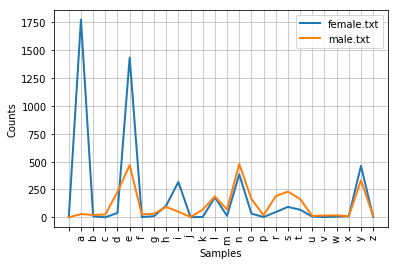

In [82]:
cfd = nltk.ConditionalFreqDist(
        (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

In [85]:
#4.2 A pronouncing Dictionary
entries = nltk.corpus.cmudict.entries()
len(entries)
for entry in entries[42371:42379]:
    print(entry)for word, pron in entries:
    if len(pron) ==3:
        ph1, ph2, ph3 =pron
        if ph1 == 'p' and ph3 == 'T':
            print(word,ph2,end=' ')

(u'fir', [u'F', u'ER1'])
(u'fire', [u'F', u'AY1', u'ER0'])
(u'fire', [u'F', u'AY1', u'R'])
(u'firearm', [u'F', u'AY1', u'ER0', u'AA2', u'R', u'M'])
(u'firearm', [u'F', u'AY1', u'R', u'AA2', u'R', u'M'])
(u'firearms', [u'F', u'AY1', u'ER0', u'AA2', u'R', u'M', u'Z'])
(u'firearms', [u'F', u'AY1', u'R', u'AA2', u'R', u'M', u'Z'])
(u'fireball', [u'F', u'AY1', u'ER0', u'B', u'AO2', u'L'])


In [88]:
for word, pron in entries:
    if len(pron) ==3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word,ph2,end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

In [93]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

[w for w, pron in entries if pron[-1]=='M' and w[-1]=='n']

sorted(set([w[:2] for w, pron in entries if pron[0]=='N' and w[0]!='n']))

[u"atlantic's",
 u'audiotronics',
 u'avionics',
 u'beatniks',
 u'calisthenics',
 u'centronics',
 u'chamonix',
 u'chetniks',
 u"clinic's",
 u'clinics',
 u'conics',
 u'conics',
 u'cryogenics',
 u'cynics',
 u'diasonics',
 u"dominic's",
 u'ebonics',
 u'electronics',
 u"electronics'",
 u"endotronics'",
 u'endotronics',
 u'enix',
 u'environics',
 u'ethnics',
 u'eugenics',
 u'fibronics',
 u'flextronics',
 u'harmonics',
 u'hispanics',
 u'histrionics',
 u'identics',
 u'ionics',
 u'kibbutzniks',
 u'lasersonics',
 u'lumonics',
 u'mannix',
 u'mechanics',
 u"mechanics'",
 u'microelectronics',
 u'minix',
 u'minnix',
 u'mnemonics',
 u'mnemonics',
 u'molonicks',
 u'mullenix',
 u'mullenix',
 u'mullinix',
 u'mulnix',
 u"munich's",
 u'nucleonics',
 u'onyx',
 u'organics',
 u"panic's",
 u'panics',
 u'penix',
 u'pennix',
 u'personics',
 u'phenix',
 u"philharmonic's",
 u'phoenix',
 u'phonics',
 u'photronics',
 u'pinnix',
 u'plantronics',
 u'pyrotechnics',
 u'refuseniks',
 u"resnick's",
 u'respironics',
 u'sc

In [97]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

[w for w,pron in entries if stress(pron)==['0','1','0','2','0']]

[w for w,pron in entries if stress(pron)==['0','2','0','1','0']]

[u'abbreviation',
 u'abbreviations',
 u'abomination',
 u'abortifacient',
 u'abortifacients',
 u'academicians',
 u'accommodation',
 u'accommodations',
 u'accreditation',
 u'accreditations',
 u'accumulation',
 u'accumulations',
 u'acetylcholine',
 u'acetylcholine',
 u'adjudication',
 u'administration',
 u"administration's",
 u'administrations',
 u"administrations'",
 u'aduliadae',
 u'adulteration',
 u'affiliation',
 u'affiliations',
 u'aficionados',
 u'agglomeration',
 u'ahasuerus',
 u'ajinomoto',
 u'alleviation',
 u'amalgamation',
 u'ambrosiano',
 u'amelioration',
 u'americana',
 u"americana's",
 u'americanas',
 u'americano',
 u'americanos',
 u'anachronistic',
 u'anencephalic',
 u'annihilation',
 u'antagonistic',
 u'anticipation',
 u'anticipations',
 u'apocalyptic',
 u'apologetic',
 u'apotheosis',
 u'appreciation',
 u'appropriation',
 u'appropriations',
 u'approximation',
 u'approximations',
 u'aristocratic',
 u'arunachalam',
 u'assassination',
 u'assassinations',
 u'assimilation',
 u'a

In [99]:
# find all the p-words consisting of three sounds, and group them according to their first and last sounds
p3 = [(pron[0]+'-'+pron[2],word)
     for (word, pron) in entries
     if pron[0] == 'P' and len(pron) ==3
]
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template])>10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + '...')

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [105]:
prondict = nltk.corpus.cmudict.dict()
#exist
prondict['fire']
#not exist
prondict['blog'] = [['B','L','AA1','G']]
prondict['blog']

text = ['natural','language','processing']
[ph for w in text for ph in prondict[w][0]]


[u'N',
 u'AE1',
 u'CH',
 u'ER0',
 u'AH0',
 u'L',
 u'L',
 u'AE1',
 u'NG',
 u'G',
 u'W',
 u'AH0',
 u'JH',
 u'P',
 u'R',
 u'AA1',
 u'S',
 u'EH0',
 u'S',
 u'IH0',
 u'NG']

In [112]:
#4.3 comparative wordlist
from nltk.corpus import swadesh
swadesh.fileids()
swadesh.words('en')

fr2en = swadesh.entries(['fr','en']) 
translate = dict(fr2en)
translate['chien']
translate['jeter']

u'throw'

In [114]:
de2en = swadesh.entries(['de','en']) #German-English
es2en = swadesh.entries(['es','en']) #Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']
translate['perro']

u'dog'

In [115]:
languages = ['en','de','nl','es','fr','pt','la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

(u'say', u'sagen', u'zeggen', u'decir', u'dire', u'dizer', u'dicere')
(u'sing', u'singen', u'zingen', u'cantar', u'chanter', u'cantar', u'canere')
(u'play', u'spielen', u'spelen', u'jugar', u'jouer', u'jogar, brincar', u'ludere')
(u'float', u'schweben', u'zweven', u'flotar', u'flotter', u'flutuar, boiar', u'fluctuare')


In [116]:
# 4.4shoebox and toolbox lexicons
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

[(u'kaa',
  [(u'ps', u'V'),
   (u'pt', u'A'),
   (u'ge', u'gag'),
   (u'tkp', u'nek i pas'),
   (u'dcsv', u'true'),
   (u'vx', u'1'),
   (u'sc', u'???'),
   (u'dt', u'29/Oct/2005'),
   (u'ex', u'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   (u'xp', u'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   (u'xe', u'Apoka is gagging from food while talking.')]),
 (u'kaa',
  [(u'ps', u'V'),
   (u'pt', u'B'),
   (u'ge', u'strangle'),
   (u'tkp', u'pasim nek'),
   (u'arg', u'O'),
   (u'vx', u'2'),
   (u'dt', u'07/Oct/2006'),
   (u'ex', u'Rera rauroro rera kaarevoi.'),
   (u'xp', u'Em i holim pas em na nekim em.'),
   (u'xe', u'He is holding him and strangling him.'),
   (u'ex',
    u'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   (u'xp',
    u'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   (u'xe',
    u"They strangled the man's neck with rope because he was very stubborn and arrogant."),
   (u'ex',
    u'Oirato okoearo kaaivoi iro

In [128]:
# 5.WordNet
#5.1 Senses and Synonyms
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

wn.synset('car.n.01').lemma_names()
wn.synset('car.n.01').definition()
wn.synset('car.n.01').examples()

wn.synset('car.n.01').lemmas()

wn.lemma('car.n.01.automobile')

wn.lemma('car.n.01.automobile').synset()

wn.lemma('car.n.01.automobile').name()

wn.synsets('car')

for synset in wn.synsets('car'):
    print(synset.lemma_names())
    
wn.lemmas('car')

[u'car', u'auto', u'automobile', u'machine', u'motorcar']
[u'car', u'railcar', u'railway_car', u'railroad_car']
[u'car', u'gondola']
[u'car', u'elevator_car']
[u'cable_car', u'car']


[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [139]:
#5.2 the wordnet hierarchy
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

motorcar.hypernyms()

paths = motorcar.hypernym_paths()
len(paths)

[synset.name() for synset in paths[0]]

[synset.name() for synset in paths[1]]

motorcar.root_hypernyms()

[Synset('entity.n.01')]

In [142]:
#5.3 More lexical relations
wn.synset('tree.n.01').part_meronyms()

wn.synset('tree.n.01').substance_meronyms()

wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [147]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())
    
wn.synset('mint.n.04').part_holonyms()

wn.synset('mint.n.04').substance_holonyms()

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


[Synset('mint.n.05')]

In [151]:
wn.synset('walk.v.01').entailments()

wn.synset('eat.v.01').entailments()

wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

In [157]:
wn.lemma('supply.n.02.supply').antonyms()

wn.lemma('rush.v.01.rush').antonyms()

wn.lemma('horizontal.a.01.horizontal').antonyms()

wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

In [161]:
# 5.4 Semantic Similarity
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

right.lowest_common_hypernyms(orca)
right.lowest_common_hypernyms(tortoise)
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

In [165]:
wn.synset('baleen_whale.n.01').min_depth()

wn.synset('whale.n.02').min_depth()

wn.synset('vertebrate.n.01').min_depth()

wn.synset('entity.n.01').min_depth()

0

In [169]:
right.path_similarity(minke)

right.path_similarity(orca)

right.path_similarity(tortoise)

right.path_similarity(novel)

0.043478260869565216